<a href="https://colab.research.google.com/github/a01137646/ComputerVision/blob/main/10_morphological_operations/10_morphological_operations_Jorge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10. Morphological Operations

## Table of Contents
1. [Libraries](#libraries)
2. [Erosion](#erosion)
3. [Dilation](#dilation)
4. [Opening](#opening)
5. [Closing](#closing)
6. [Morphological Gradient](#gradient)
7. [Morphological Hats](#hats)
   1. [Top or White Hat](#top)
   1. [Black Hat](#black)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving card_1.jpg to card_1.jpg


User uploaded file "card_1.jpg" with length 83745 bytes


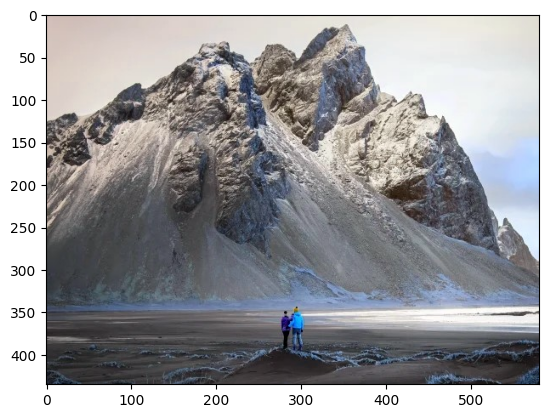

In [3]:
for fn in uploaded.keys():
  # Print the file name
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  # Load the image using OpenCV
  image = cv2.imread(fn)

  # Display the image
  plt.imshow(image)
  plt.show()


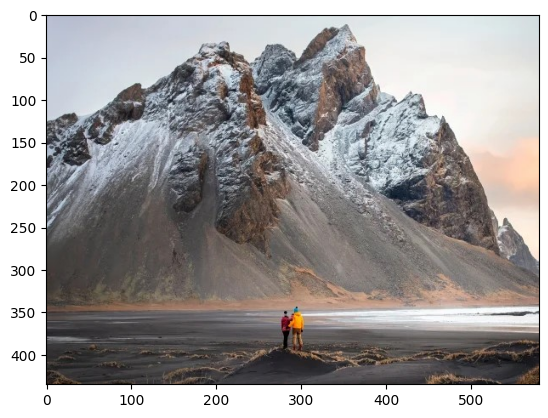

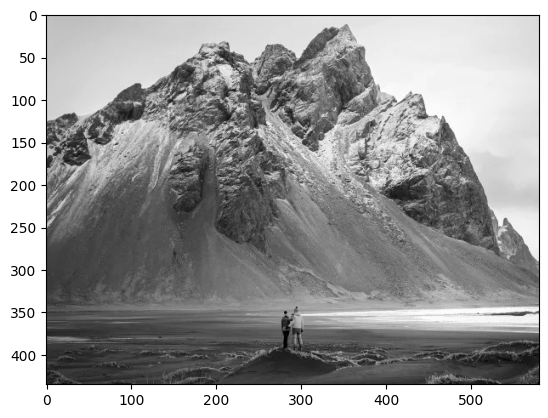

In [15]:
#img = cv2.imread('image.jpg')
img1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img2 = cv2.imread(fn,0)
plt.imshow(img1)
plt.show()

plt.imshow(img2, cmap='gray')
plt.show()

(435, 580, 3) (435, 580, 3) (435, 580)


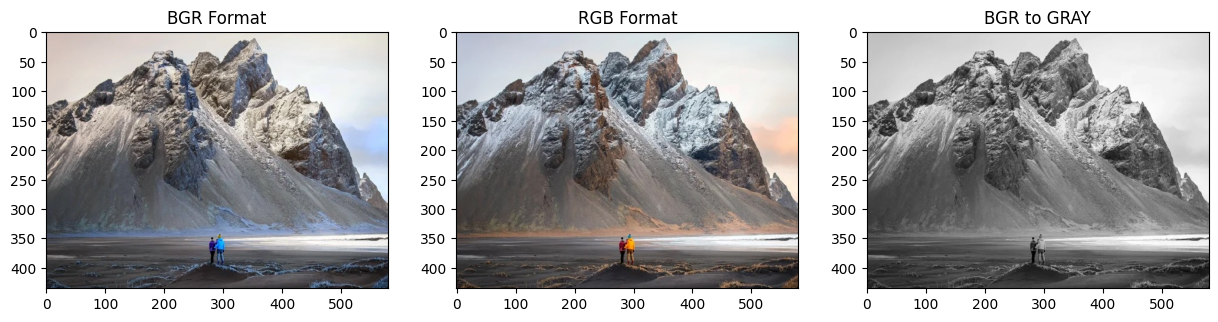

In [17]:
#function to see image
def imgshow(img=img,img1=img1,img2=img2, rows=1,columns=3):
    print(img.shape,img1.shape,img2.shape)
    fig = plt.figure(figsize=(15,8))
    #adds a subplot at 1st position
    fig.add_subplot(rows,columns,1)
    plt.title('BGR Format')
    plt.imshow(img)

    #adds a subplot at 2nd position
    fig.add_subplot(rows,columns,2)
    plt.title('RGB Format')
    plt.imshow(img1)

    #adds a subplot at 3rd position
    fig.add_subplot(rows,columns, 3)
    plt.title('BGR to GRAY')
    plt.imshow(img2,cmap="gray")
    plt.show()

imgshow(img=image,img1=img1,img2=img2, rows=1,columns=3)

## Erosion <a class="anchor" id="erosion" ></a>

Erosin primarily involves eroding(thinning) outer surface(foreground) of image
- Tt is suggested to have foreground as white

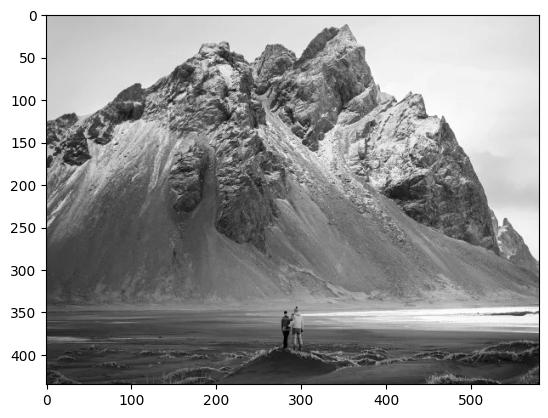

In [20]:
BGR2GRAY = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(BGR2GRAY,cmap="gray")
plt.show()

Eroding boundy of image upto 3 level

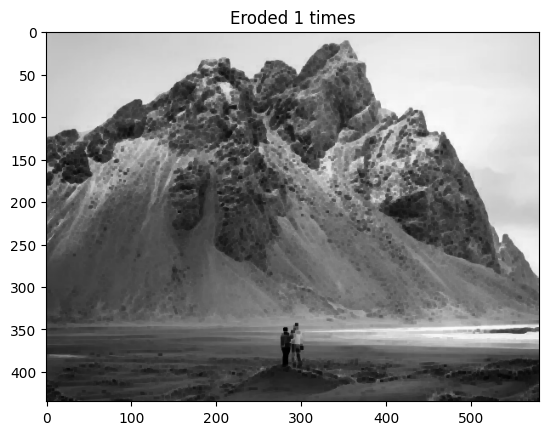

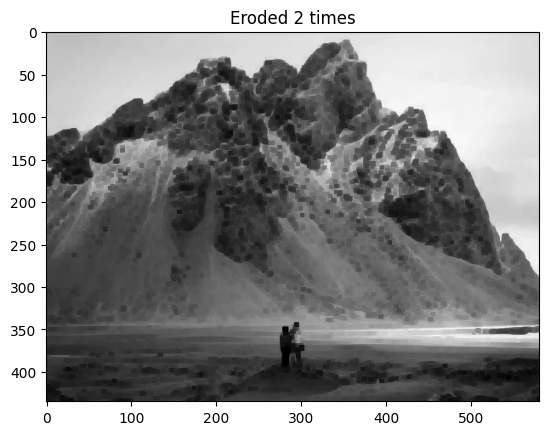

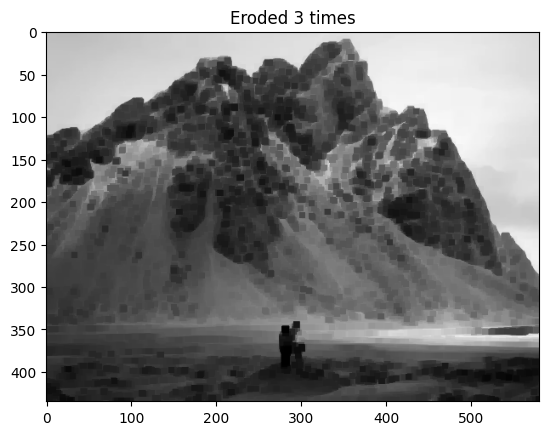

In [21]:
def plt_imshow(title, image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

for i in range(0,3):
    eroded = cv2.erode(BGR2GRAY.copy(), None, iterations=i+1)
    plt_imshow("Eroded {} times".format(i+1), eroded)

### Binarize Image

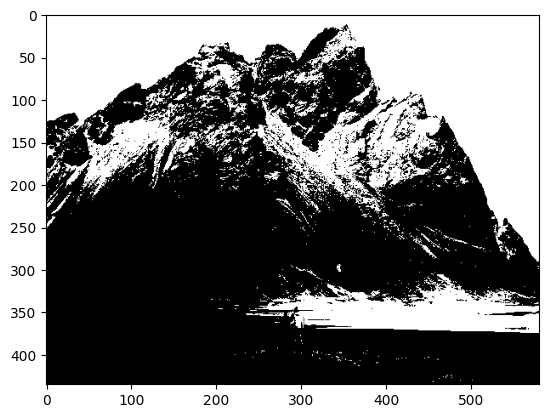

In [22]:
binr = cv2.threshold(BGR2GRAY, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
image = cv2.cvtColor(binr, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

### We can Invert Image to keep foreground in white

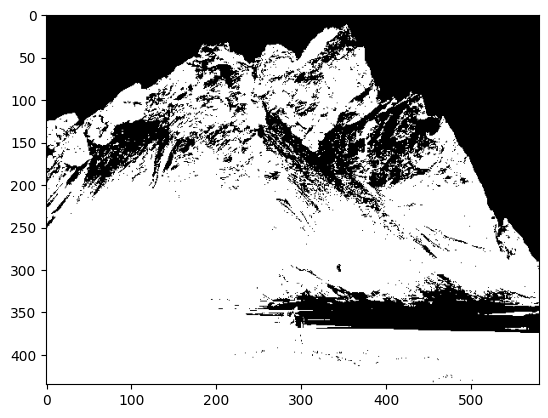

In [23]:
invert = cv2.bitwise_not(binr)
image = cv2.cvtColor(invert, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

Then, we can define a kernel of $5 \times 5$ to use in erosion

In [24]:
kernel = np.ones((5,5), np.uint8) #check for 3*3 or 7*7 kernel size too
print(kernel)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


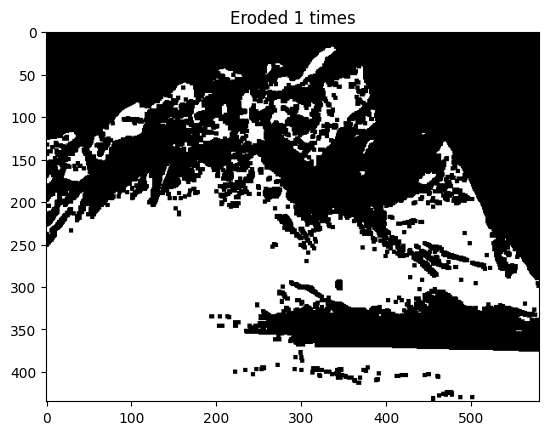

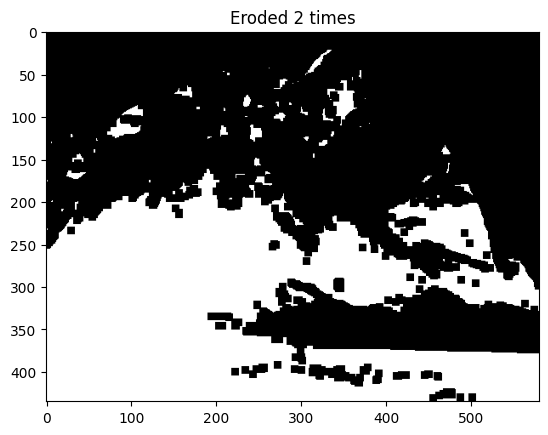

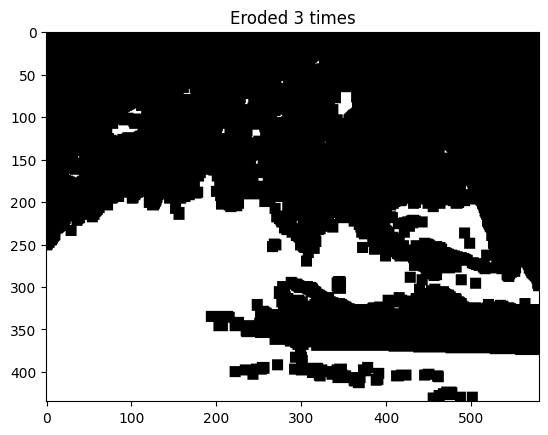

In [25]:
for i in range(0,3):
    eroded = cv2.erode(invert.copy(),kernel=kernel, iterations=i+1)
    plt_imshow("Eroded {} times".format(i+1), eroded)

## Dilation <a class="anchor" id="dilation" ></a>

Involves dilating outer surface (foreground) of image
- For joining broken parts of an image together

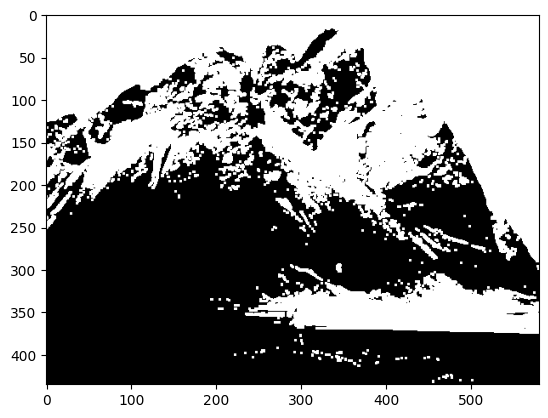

In [26]:
#binarize image
binr = cv2.threshold(BGR2GRAY,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
kernel = np.ones((3,3),np.uint8)
invert = cv2.bitwise_not(binr)

#dilate image
dilation = cv2.dilate(binr, kernel, iterations=1)

plt.imshow(dilation, cmap='gray')
plt.show()

We can apply series of dilations on inverted image using no kernel


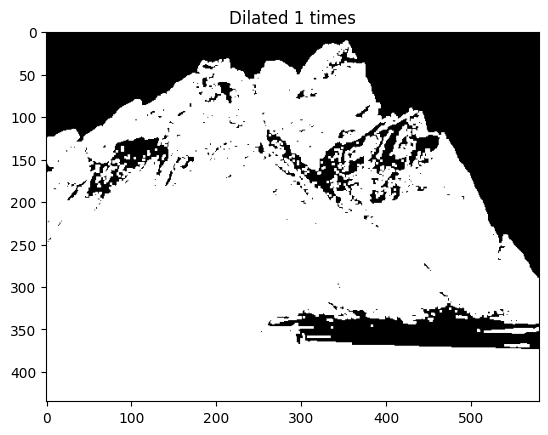

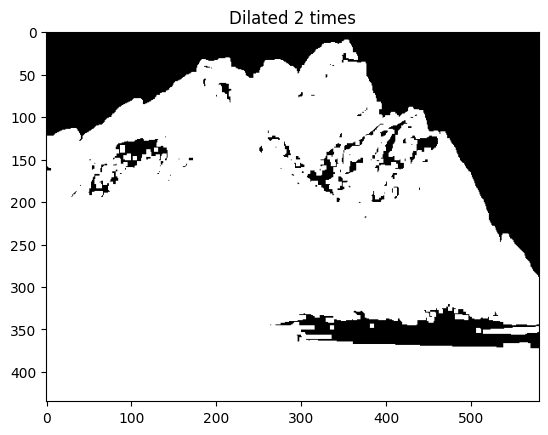

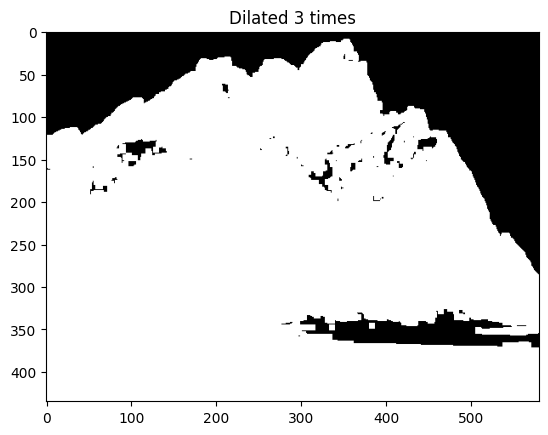

In [27]:
for i in range(0,3):
    dilated = cv2.dilate(invert.copy(),None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),dilated)

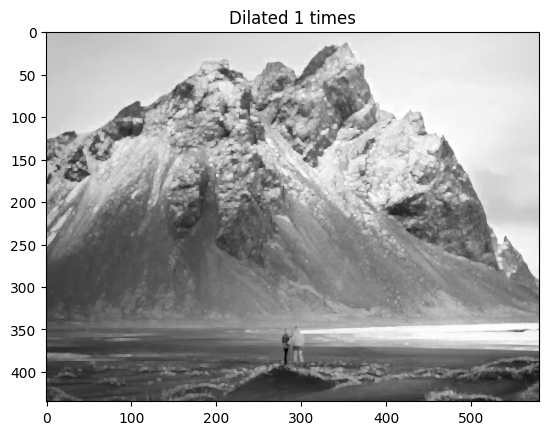

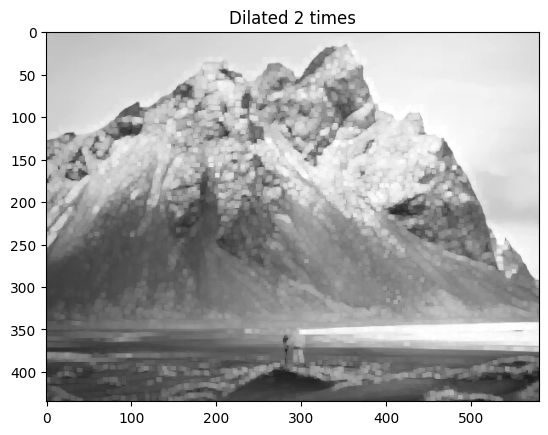

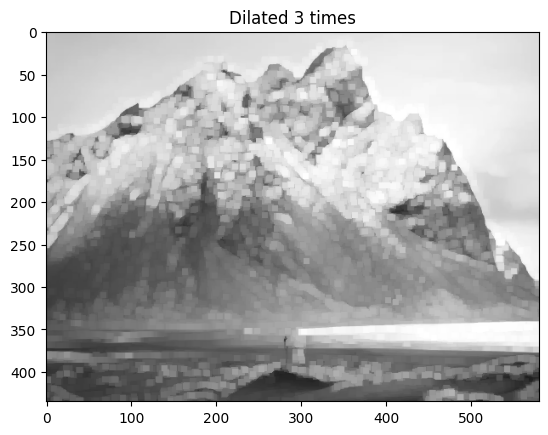

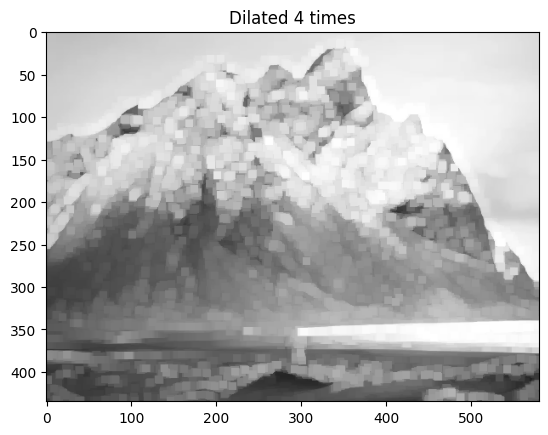

In [28]:
for i in range(0,4):
    dilated = cv2.dilate(BGR2GRAY.copy(),None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),dilated)

## Opening <a class="anchor" id="opening" ></a>

Erosion followed by dilation in outer surface (foreground) of image
- Generally used to remove noise (small blobs) in image


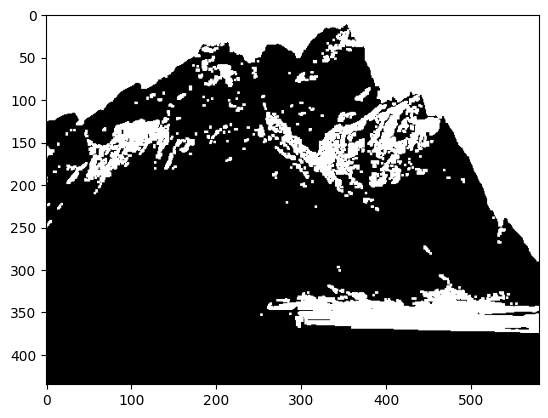

In [29]:
#opening image
opening = cv2.morphologyEx(binr,cv2.MORPH_OPEN,kernel,iterations=1)

#print output
plt.imshow(opening, cmap='gray')
plt.show()

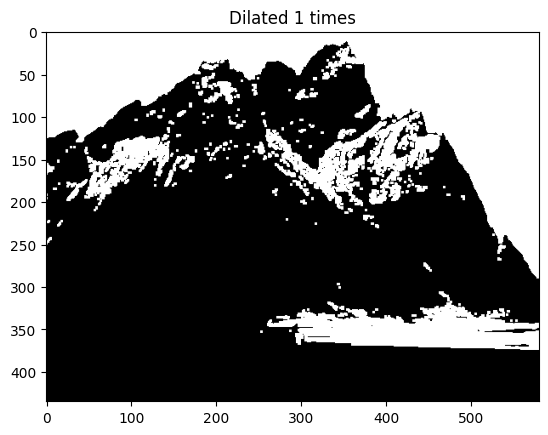

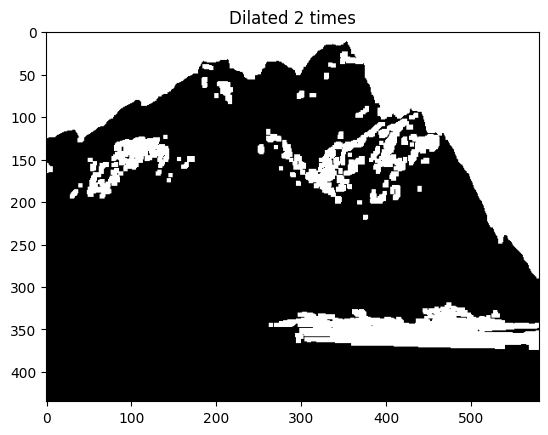

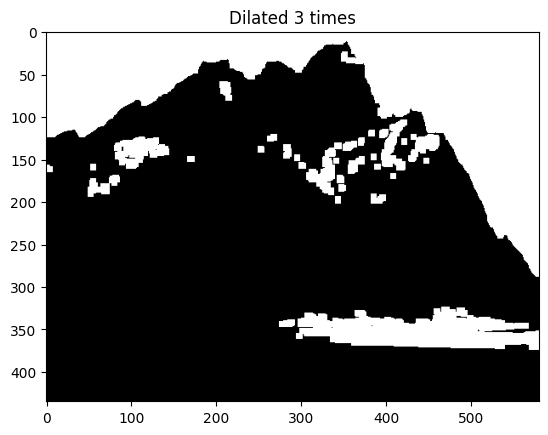

In [30]:
for i in range(0,3):
    opening = cv2.morphologyEx(binr.copy(),cv2.MORPH_OPEN,None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),opening)
    plt.show()

## Closing <a class="anchor" id="closing" ></a>

Dilation followed by erosion in outer surface (foreground) of image
- Generally used to close holes inside of objects or for connecting components together

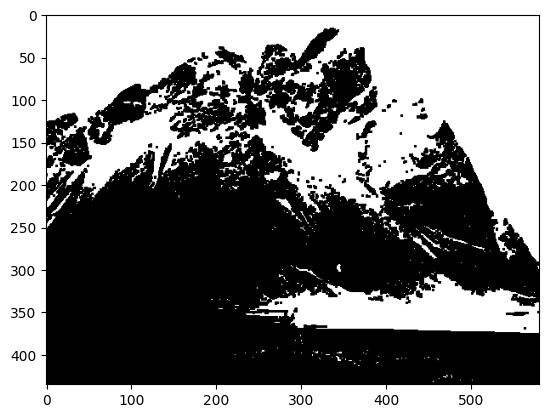

In [31]:
#closing image
closing = cv2.morphologyEx(binr, cv2.MORPH_CLOSE, kernel, iterations=1)

#print output
plt.imshow(closing,cmap='gray')
plt.show()

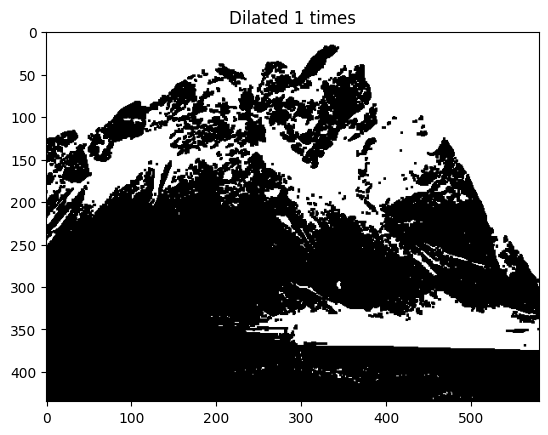

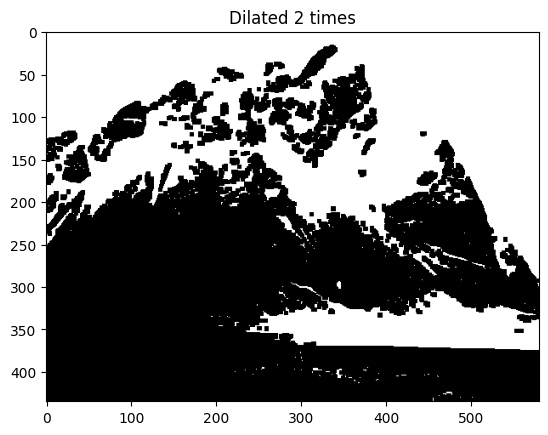

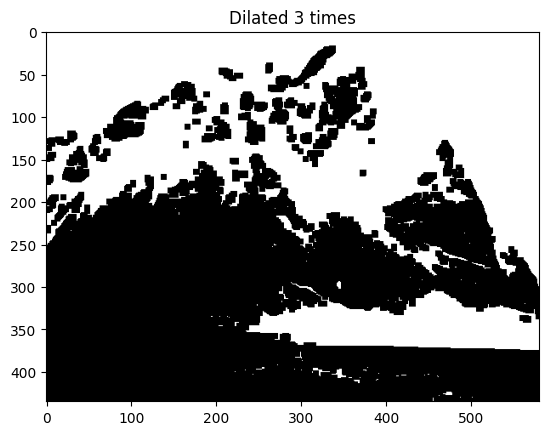

In [32]:
for i in range(0,3):
    closing = cv2.morphologyEx(binr.copy(),cv2.MORPH_CLOSE,None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),closing)
    plt.show()

Iterating with different kernels

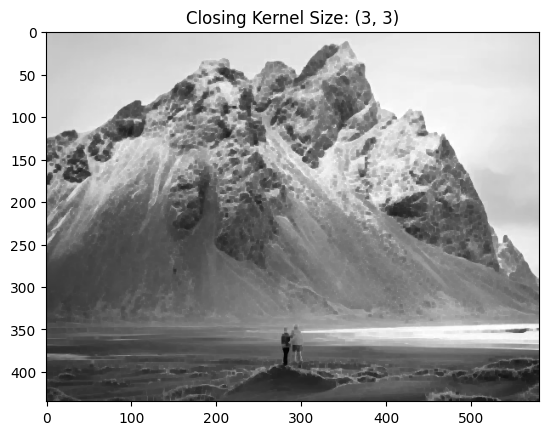

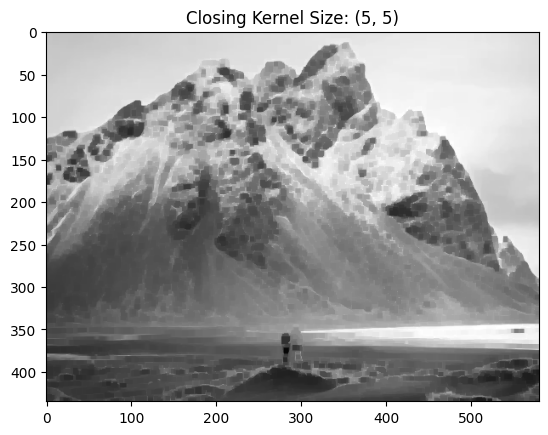

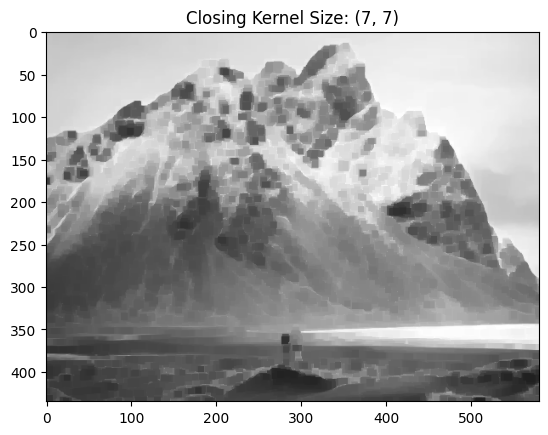

In [37]:
kernelSizes = [(3,3), (5,5), (7,7)]
BGR2GRAY = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

for kernelSize in kernelSizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    closing = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_CLOSE, kernel)
    plt_imshow("Closing Kernel Size: ({}, {})".format(kernelSize[0], kernelSize[1]), closing)

## Morphological Gradient <a class="anchor" id="gradient" ></a>

It first applies erosion and dilation individually on image and then computes difference between eroded and dilated image

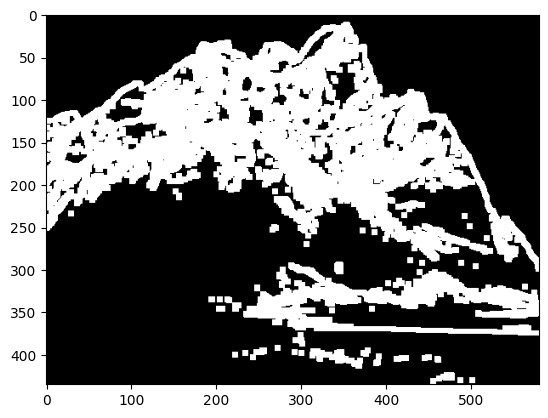

In [38]:
# use morph gradient
morph_gradient = cv2.morphologyEx(invert,cv2.MORPH_GRADIENT,kernel)

#print output
plt.imshow(morph_gradient, cmap='gray')
plt.show()

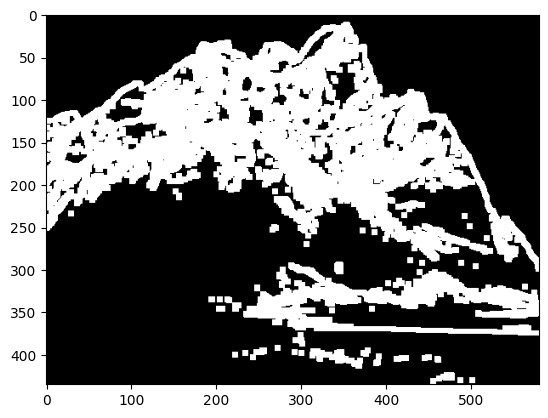

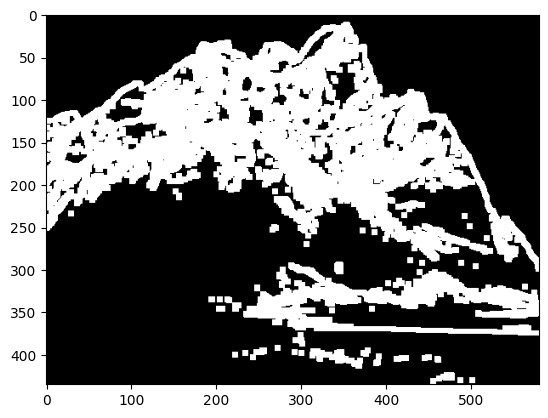

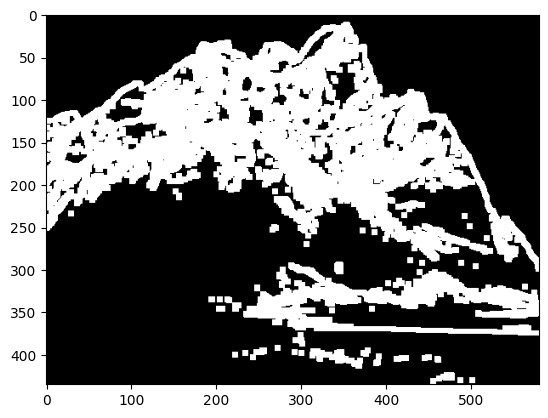

In [39]:
for i in range(0,3):
    # use morph gradient
    morph_gradient = cv2.morphologyEx(invert,cv2.MORPH_GRADIENT,kernel+i)
    #print output
    plt.imshow(morph_gradient, cmap='gray')
    plt.show()

Iterating with different kernels

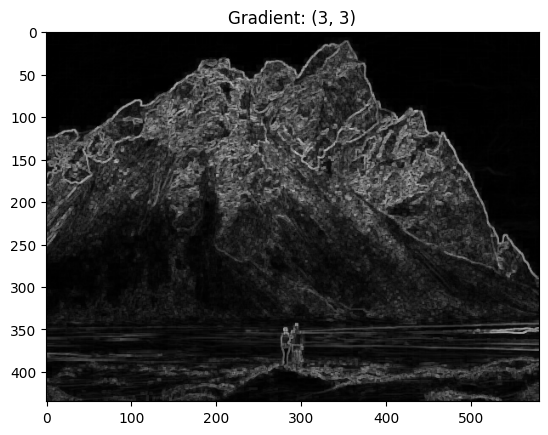

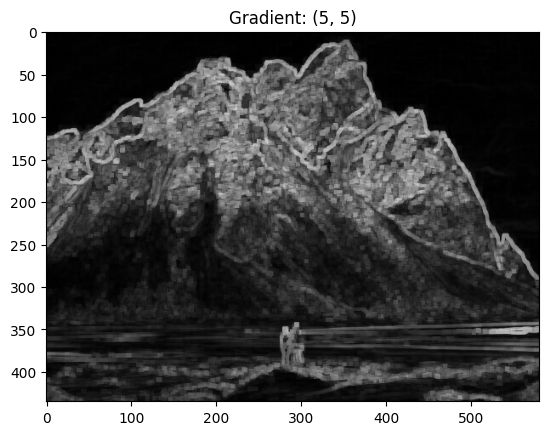

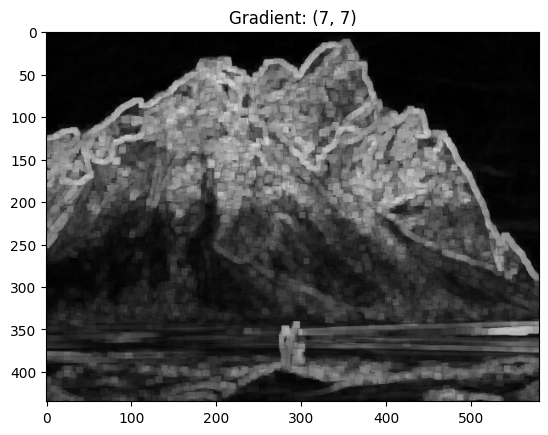

In [42]:
kernelSizes = [(3,3), (5,5), (7,7)]
BGR2GRAY = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

for kernelSize in kernelSizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    gradient = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_GRADIENT, kernel)
    plt_imshow("Gradient: ({}, {})".format(
        kernelSize[0], kernelSize[1]), gradient)

## Morphological Hats <a class="anchor" id="hats" ></a>

1. Top or White Hat
2. Black hat

### Top or White Hat <a class="anchor" id="top" ></a>

It is the difference between original (grayscale/single channel) input image and opening image

- Finds light(bright) regions of an image on dark background


In [43]:
#construct a kernel (13x5)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(13,5))
kernel

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

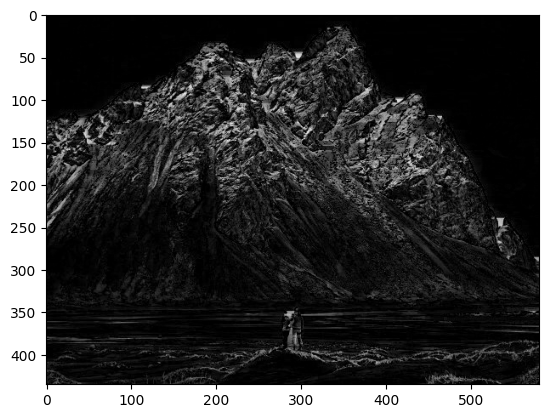

In [44]:
tophat = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_TOPHAT, kernel)

plt.imshow(tophat, cmap='gray')
plt.show()

### Black Hat <a class="anchor" id="black" ></a>

Output is a difference between input image & opened image
- Finds dark regions on a light background


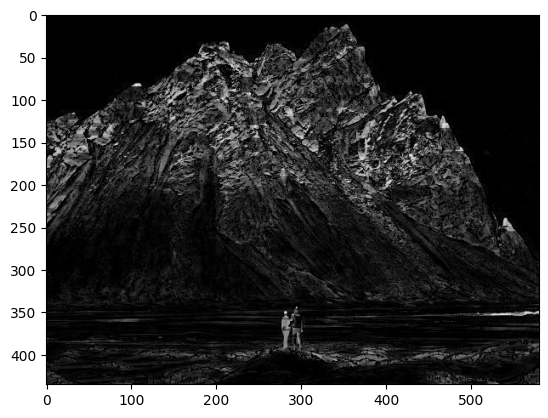

In [45]:
blackhat = cv2.morphologyEx(BGR2GRAY,cv2.MORPH_BLACKHAT,kernel)

plt.imshow(blackhat, cmap='gray')
plt.show()

## Actividades <a class="anchor" id="Actividades" ></a>

### a) Investigar una aplicación de erosión en procesamiento de imágenes e implementarlo en Colab

Una de las aplicaciones más frecuentes en el mejoramiento de imágenes, se basa en la lectura de placas vehículares. A continuación, se lleva a cabo la aplicación de ersosión.

In [46]:
uploaded = files.upload()

Saving plate.jpeg to plate.jpeg


User uploaded file "plate.jpeg" with length 9092 bytes


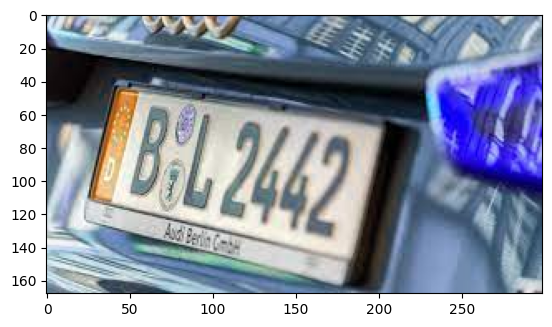

In [47]:
for fn in uploaded.keys():
  # Print the file name
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  # Load the image using OpenCV
  image = cv2.imread(fn)

  # Display the image
  plt.imshow(image)
  plt.show()


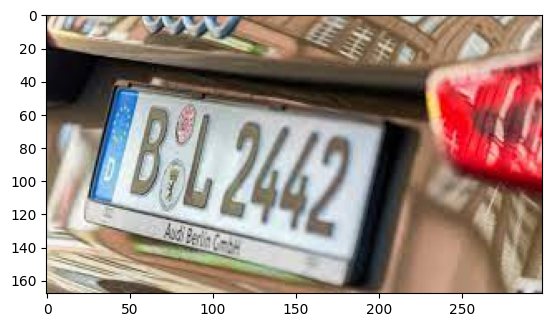

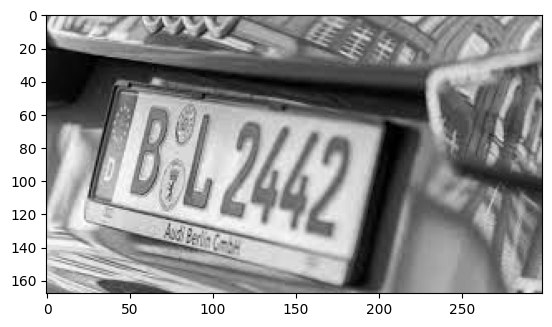

In [48]:
#img = cv2.imread('image.jpg')
img1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img2 = cv2.imread(fn,0)
plt.imshow(img1)
plt.show()

plt.imshow(img2, cmap='gray')
plt.show()

(<Axes: title={'center': 'Erosion image'}>,
 Text(0.5, 1.0, 'Erosion image'))

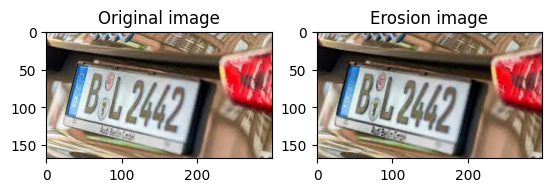

In [59]:
kernel = np.ones((2,2),np.uint8)
erosion = cv2.erode(img1,kernel,iterations = 1)

plt.subplot(121), plt.imshow(img1), plt.title('Original image')
plt.subplot(122), plt.imshow(erosion), plt.title('Erosion image')

### b) Investigar una aplicación de dilatación en procesamiento de imágenes e implementarlo en Colab

En el siguiente ejemplo, se visualiza la aplicación de dilatación.

(<Axes: title={'center': 'Dilated image'}>,
 Text(0.5, 1.0, 'Dilated image'))

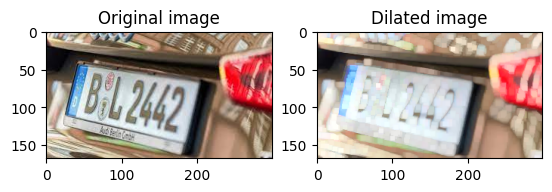

In [69]:
kernel = np.ones((6,6),np.uint8)
dilation = cv2.dilate(img1,kernel,iterations = 1)

plt.subplot(121), plt.imshow(img1), plt.title('Original image')
plt.subplot(122), plt.imshow(dilation), plt.title('Dilated image')

### c) Investigar una aplicación de opening y closing e implementalo en Google Colab

Por último, se muestra la aplicación de Opening y Closing.

(<Axes: title={'center': 'Opening image'}>,
 Text(0.5, 1.0, 'Opening image'))

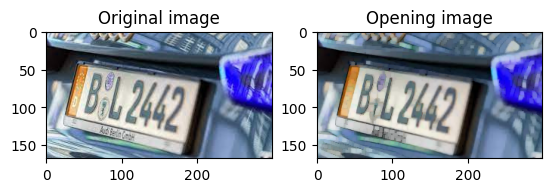

In [89]:
kernel = np.ones((4,4),np.uint8)
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

plt.subplot(121), plt.imshow(image), plt.title('Original image')
plt.subplot(122), plt.imshow(opening), plt.title('Opening image')

(<Axes: title={'center': 'Closing image'}>,
 Text(0.5, 1.0, 'Closing image'))

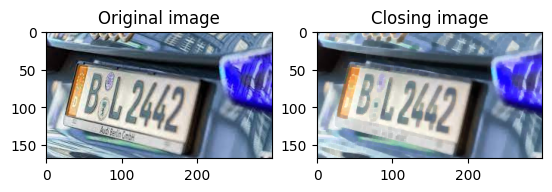

In [92]:
kernel = np.ones((4,4),np.uint8)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

plt.subplot(121), plt.imshow(image), plt.title('Original image')
plt.subplot(122), plt.imshow(closing), plt.title('Closing image')

## Fuentes <a class="anchor" id="Fuentes" ></a>

Capitulo 9. Digital Image Processing. R. Gonzalez & R. Woods. 4° Edition. Pearson.

https://pyimagesearch.com/2021/04/28/opencv-morphological-operations

https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

https://towardsdatascience.com/understanding-morphological-image-processing-and-its-operations-7bcf1ed11756

https://medium.com/analytics-vidhya/morphological-transformations-of-images-using-opencv-image-processing-part-2-f64b14af2a38